In [57]:
# import library
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

# fits file
fits_data = fits.open('Elias27_CO.fits')

In [58]:
data = fits_data[0].data
print(data.shape)

(1, 60, 2000, 2000)


In [59]:
data = data[0, :, :, :]
print(data.shape)

(60, 2000, 2000)


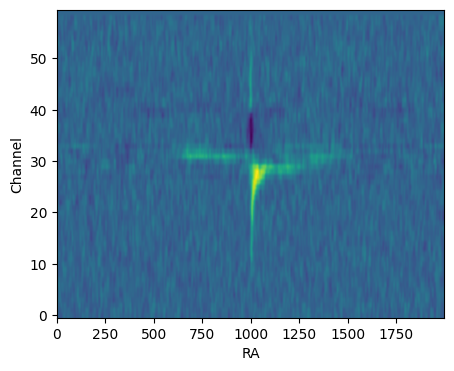

In [60]:
yz_data = data[:, :, 1000] # yz data where x = 1000

plt.figure(figsize=(5, 4))
plt.imshow(yz_data, cmap='viridis', origin='lower', aspect='auto')

plt.xlabel('RA')  # y axis (RA)
plt.ylabel('Channel') # z axis (frequency)

plt.show()

In [62]:
# header check
header = fits_data[0].header
header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                 2000                                                  
NAXIS2  =                 2000                                                  
NAXIS3  =                   60                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   3.660938118344E-05                                                  
BMIN    =   3.081241484993E-05                                                  
BPA     =  -5.662528037323E+

In [63]:
ra = header['CRVAL1'] + (np.arange(header['NAXIS1']) - header['CRPIX1']) * header['CDELT1']
dec = header['CRVAL2'] + (np.arange(header['NAXIS2']) - header['CRPIX2']) * header['CDELT2']
freq = header['CRVAL3'] + (np.arange(header['NAXIS3']) - header['CRPIX3']) * header['CDELT3']
freq = freq / 1e9  # Hz to GHz 

In [65]:
print('R.A:', header['CRVAL1'])
print("Dec.:", header['CRVAL2'])
print("Frequency: ", header['CRVAL3'], "GHz")

R.A: 246.6875916667
Dec.: -24.38563138889
Frequency:  230544767129.5 GHz


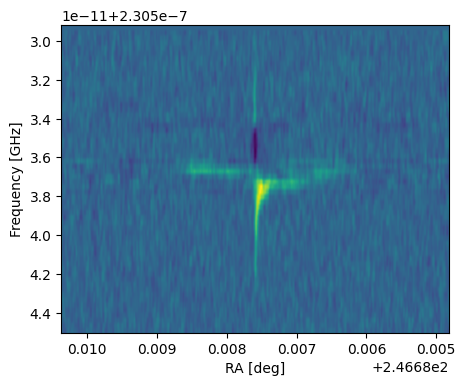

In [66]:
plt.figure(figsize=(5, 4))
plt.imshow(yz_data, cmap='viridis', origin='lower', aspect='auto', extent=[ra[0], ra[-1], freq[0], freq[-1]])

plt.xlabel('RA [deg]')  # y axis (RA)
plt.ylabel('Frequency [GHz]') # z axis (frequency)

plt.show()

In [67]:
restfreq = 230.538  # GHz,  criterion frequency of CO emission lines
c0 = 299792         # km/s, light speed
chan = 30
vel = (restfreq - freq[chan]) / restfreq * c0

Text(0, 0.5, 'Dec [deg]')

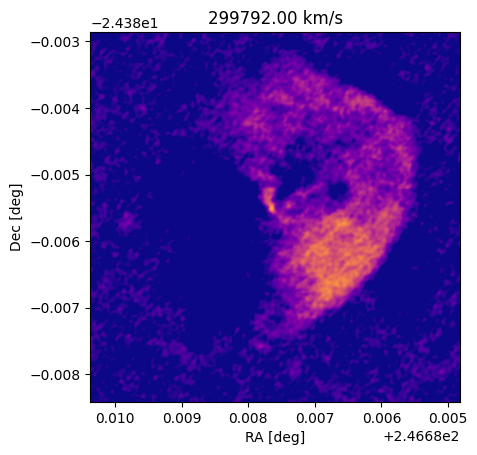

In [68]:
fig, ax = plt.subplots()

ax.imshow(data[chan, 500:1500, 500:1500],
         vmin=0, vmax=0.03,
         cmap='plasma',
         extent=[ra[0], ra[-1], dec[0], dec[-1]],
         origin='lower')

ax.set_title('{:.2f} km/s'.format(vel))
ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')

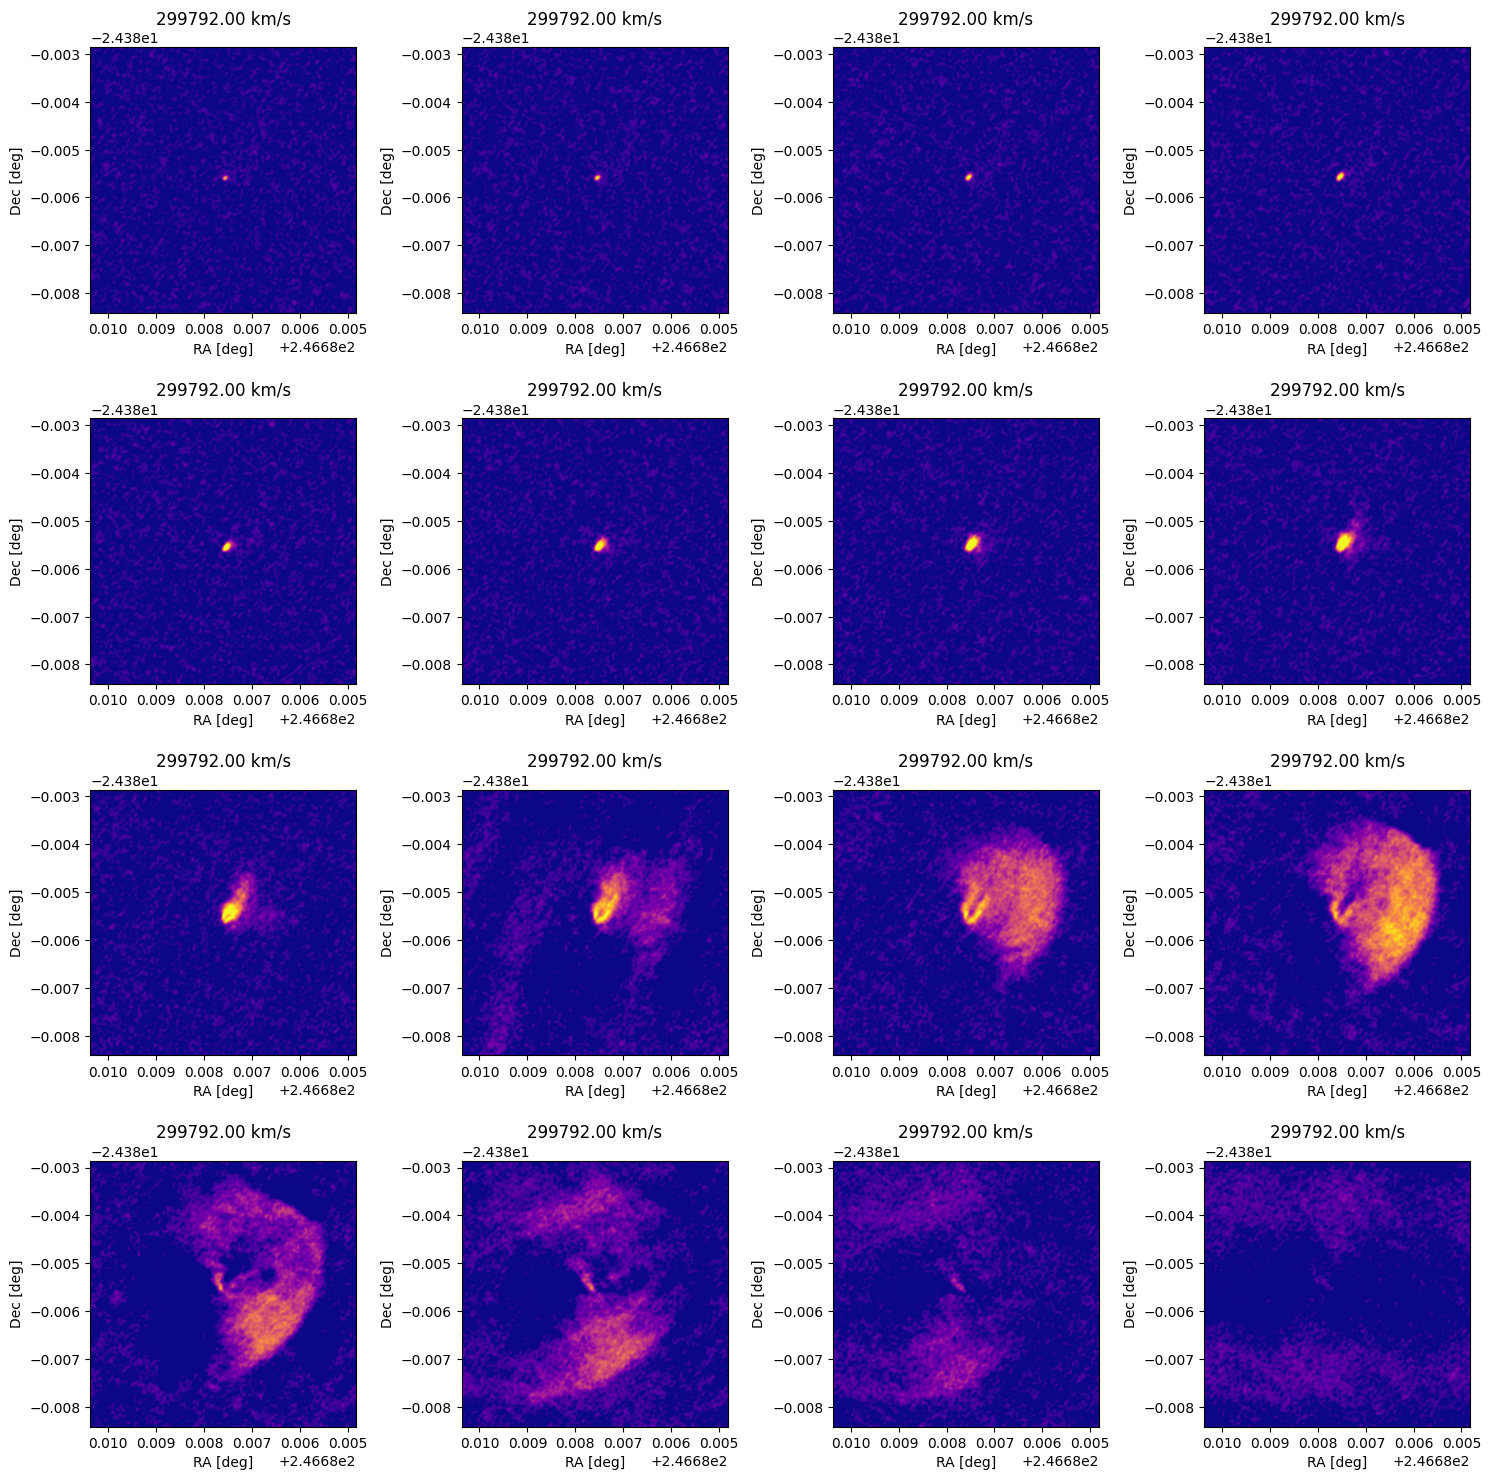

In [71]:
fig, ax = plt.subplots(4, 4, figsize=(15,15))

chans = np.arange(18, 34, 1)   # [18, 19, ..., 33]
vel = (restfreq - freq[chans]) / restfreq * c0
k = 0     # initialize index of chans 

for i in range(0, 4):
    for j in range(0, 4):
        ax[i, j].imshow(data[chans[k], 500:1500, 500:1500],
                 vmin=0, vmax=0.03,
                 cmap='plasma',
                 extent=[ra[0], ra[-1], dec[0], dec[-1]],
                 origin='lower')

        ax[i, j].set_title('{:.2f} km/s'.format(vel[k]))
        ax[i, j].set_xlabel('RA [deg]')
        ax[i, j].set_ylabel('Dec [deg]')
        k += 1
        
plt.tight_layout()
plt.show()